In [1]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [10]:
churn=pd.read_csv('customer_churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
#dropping

churn churn[['tenure', 'SeniorCitizen', 'MonthlyCharges', "Churn"]]= 
churn.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


In [13]:
y = churn["Churn"]
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [19]:
X = churn[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
X.dtypes
X

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [22]:
X['tenure'].value_counts
X['tenure'].describe

#X['SeniorCitizen'].value_counts

#Tenure = number of months a customer has subscribed for
#X['MonthlyCharges'].value_counts



<bound method NDFrame.describe of 0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64>

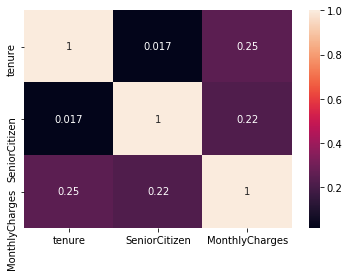

In [23]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()



#no collinearity between features

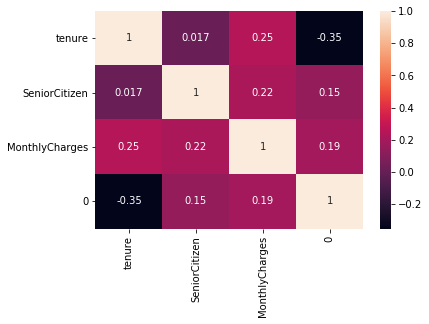

In [42]:

X_y = pd.concat([X, y ], axis=1)
X_y

correlations_matrix = X_y.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [25]:
X_num = X[['tenure','MonthlyCharges']]

#Standard scaler 

transformer = StandardScaler().fit(X_num)
X_scaled = pd.DataFrame(transformer.transform(X_num),columns=X_num.columns)
X_scaled.head()




,tenure,MonthlyCharges
0,-1.277445,-1.160323
1,0.066327,-0.259629
2,-1.236724,-0.362660
3,0.514251,-0.746535
4,-1.236724,0.197365


In [31]:
# y to encode
y = pd.Series(np.where(churn.Churn.values == 'Yes', 1, 0), churn.index)

X_scaled["SeniorCitizen"] = churn["SeniorCitizen"]


X_scaled




,tenure,MonthlyCharges,SeniorCitizen
0,-1.277445,-1.160323,0
1,0.066327,-0.259629,0
2,-1.236724,-0.362660,0
3,0.514251,-0.746535,0
4,-1.236724,0.197365,0
...,...,...,...
7038,-0.340876,0.665992,0
7039,1.613701,1.277533,0
7040,-0.870241,-1.168632,0
7041,-1.155283,0.320338,1


In [33]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_scaled, y)

LogisticRegression(random_state=0)

In [34]:
logits = np.log(1/LR.predict_proba(X_scaled)[:,1]-1)

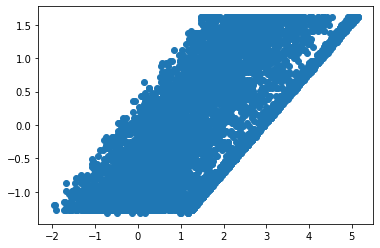

In [35]:
plt.scatter(logits,X_scaled['tenure'])


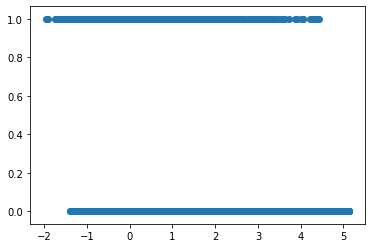

In [37]:
plt.scatter(logits,X_scaled['SeniorCitizen'])

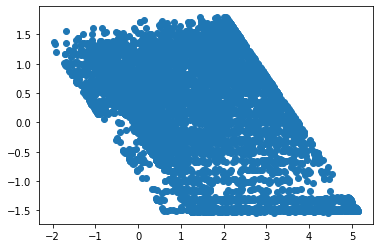

In [43]:
plt.scatter(logits,X_scaled['MonthlyCharges'])


In [49]:
#check imbalances values
y

y.value_counts()

0    5174
1    1869
dtype: int64

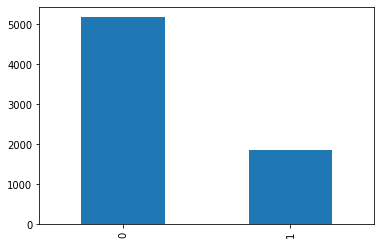

In [51]:
#plot imbalances
count_classes = pd.value_counts(y)
count_classes.plot(kind = 'bar')

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

In [54]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.7808063600227144

In [96]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

LR.score(X_test, y_test)

#We fail to identify 55% of churns


precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


0.7808063600227144

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]])

In [60]:
#RESAMPLING on training set

from sklearn.utils import resample
train = pd.concat([X_train, y_train],axis=1)
train.head()
 
# from sklearn.utils import resample

,tenure,MonthlyCharges,SeniorCitizen,0
3296,-0.340876,-0.513884,0,0
6397,0.880735,0.016229,1,0
6043,-1.196004,-0.817993,0,1
5309,1.165777,-1.479388,0,0
3000,-0.829521,0.654359,0,1


In [69]:

#separate majority/minority classes
no_churn = train[train[0]==0]
yes_churn = train[train[0]==1]
no_churn
yes_churn

#3876 no vs 1406 yes

,tenure,MonthlyCharges,SeniorCitizen,0
6043,-1.196004,-0.817993,0,1
3000,-0.829521,0.654359,0,1
6012,-1.114563,0.626109,0,1
2407,-1.236724,0.197365,0,1
3325,-1.155283,0.694243,0,1
...,...,...,...,...
2893,-0.422317,-0.191495,0,1
1701,1.369379,1.252606,0,1
705,-0.300156,0.501474,0,1
5874,-0.910961,1.191120,0,1


In [73]:
#undersampling or smote?

#I start with smote

from imblearn.over_sampling import SMOTE

In [82]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [83]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [84]:
#We fail to identify 28% of churns. Results improved.

confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]])

In [87]:
# i try with undersampling
# undersample majority
no_churn_undersampled = resample(no_churn, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(yes_churn),
                                    random_state=0)


In [89]:
display(yes_churn.shape)
display(no_churn_undersampled.shape)

(1406, 4)

(1406, 4)

In [91]:
train_undersampled = pd.concat([yes_churn,no_churn])
train_undersampled.head()


,tenure,MonthlyCharges,SeniorCitizen,0
6043,-1.196004,-0.817993,0,1
3000,-0.829521,0.654359,0,1
6012,-1.114563,0.626109,0,1
2407,-1.236724,0.197365,0,1
3325,-1.155283,0.694243,0,1


In [93]:
y_train_under = train_undersampled[0].copy()
X_train_under = train_undersampled.drop(0,axis = 1).copy()

In [95]:

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [ ]:
#Conclusion

#Data without resampling
#accuracy 0.78
#precision:  0.6115942028985507
#recall:  0.4557235421166307
#f1:  0.5222772277227723

#Accuracy is quite good, but the imbalance between the classes brings the model to overestimate the nonchurn. Thats why we are mfailing to predict 55% of the churns.



#I am oversampling with SOTE as the differencies in the number of values for each classes is quite high, and for this reason I dont want to duplicate values, which will bring a high amount of duplicates, but I prefer to simulate new observations.
#precision:  0.4776978417266187
#recall:  0.7170626349892009
#f1:  0.5734024179620035

#precision is worst, so we are guessing not so well how many churns are actually happening, but  is recall is higher and we are happy about that as we were underestimating the nochurns,

